In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
# Use the correct key '.csv' to access the uploaded file
df = pd.read_csv(io.BytesIO(uploaded['add.csv']), encoding='latin-1')

Saving add.csv to add.csv


In [ ]:
df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


<Axes: >

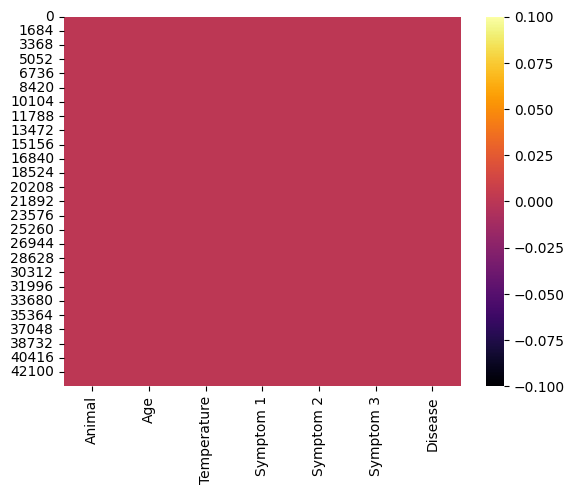

In [ ]:
#Check the null data with seaborn
sns.heatmap(df.isnull(), cmap='inferno')

In [ ]:
d=df.copy()
d.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


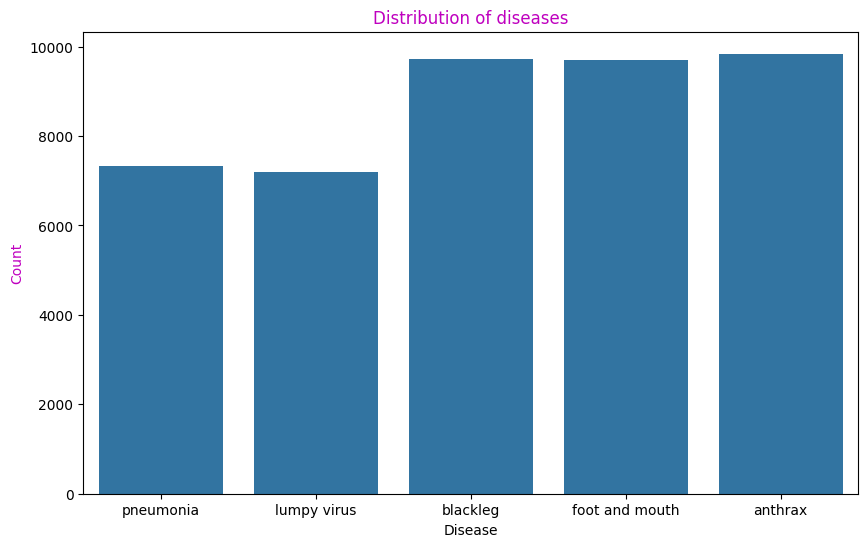

In [44]:
#@title Distribution of diseases
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Disease')
plt.title('Distribution of diseases',c='m')
plt.ylabel('Count',c='m')
plt.show()

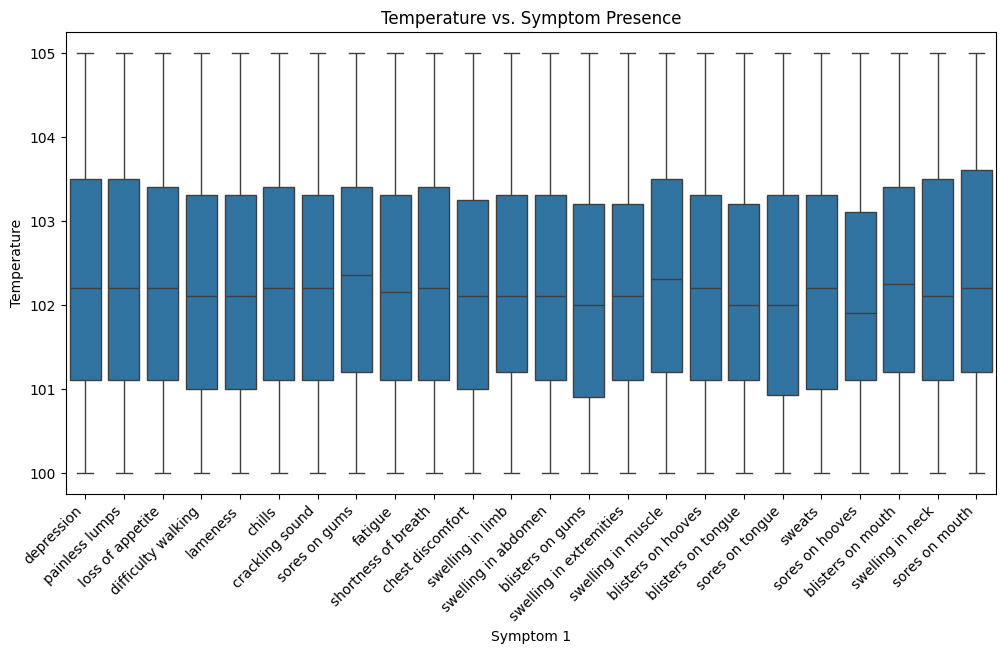

In [ ]:
# @title Temperature vs. Symptom Presence

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='Symptom 1', y='Temperature', data=d)
plt.title('Temperature vs. Symptom Presence')
plt.xlabel('Symptom 1')
plt.ylabel('Temperature')
_ = plt.xticks(rotation=45, ha='right')

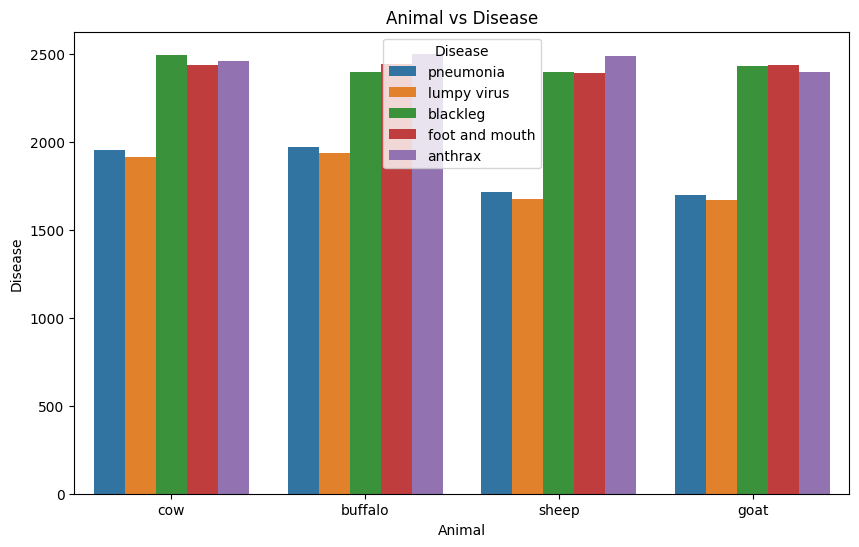

In [47]:
#@title Animal vs Disease
plt.figure(figsize=(10, 6))
sns.countplot(data=d, x='Animal', hue='Disease')
plt.title('Animal vs Disease')
plt.xlabel('Animal')
plt.ylabel('Disease')
plt.show()

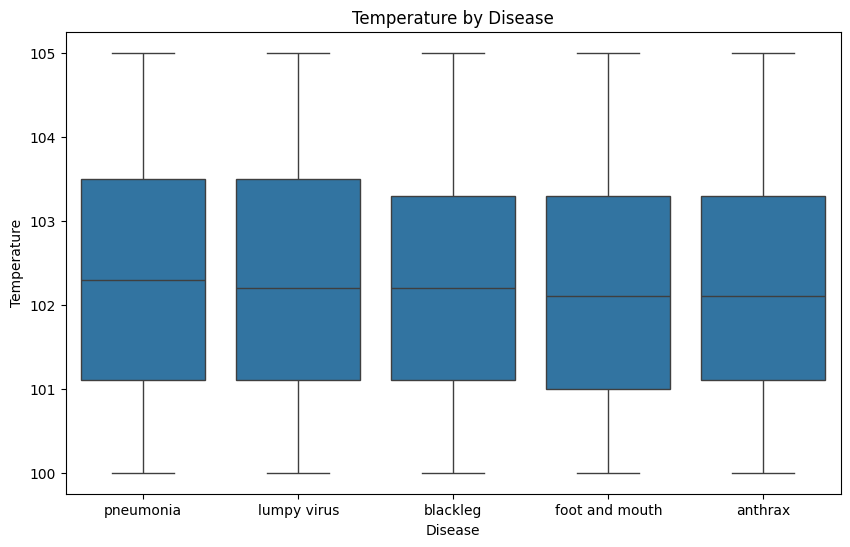

In [49]:
# @title Temperature by Disease
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Disease', y='Temperature')
plt.title('Temperature by Disease')
plt.show()

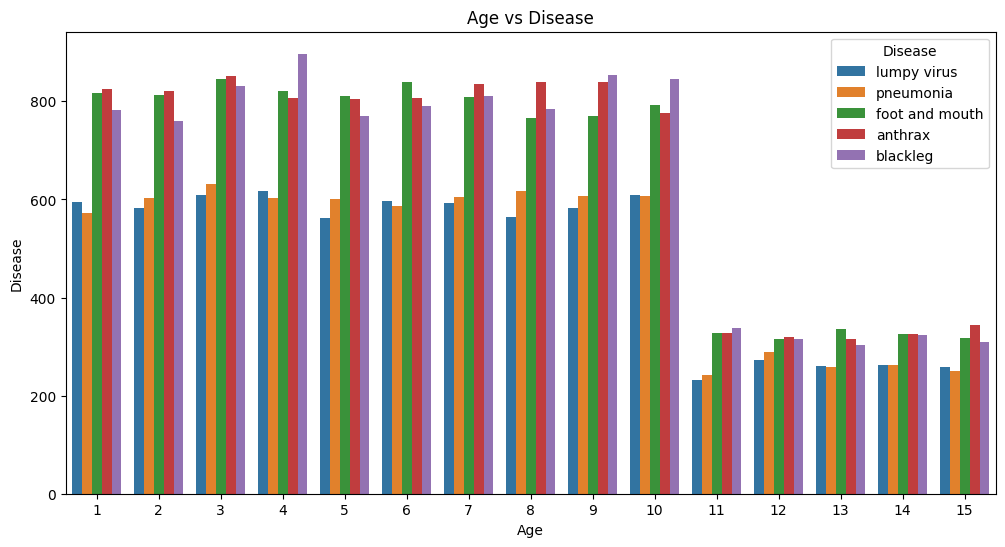

In [51]:
#@title Age vs Disease
plt.figure(figsize=(12, 6))
sns.countplot(data=d, x='Age', hue='Disease')
plt.title('Age vs Disease')
plt.xlabel('Age')
plt.ylabel('Disease')
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
d['Animal']=le.fit_transform(d['Animal'])
d['Symptom 1']=le.fit_transform(d['Symptom 1'])
d['Symptom 2']=le.fit_transform(d['Symptom 2'])
d['Symptom 3']=le.fit_transform(d['Symptom 3'])
d['Disease']=le.fit_transform(d['Disease'])

In [54]:
d.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,1,3,103.1,7,12,11,4
1,0,13,104.5,12,11,7,3
2,3,1,100.5,7,12,11,3
3,1,14,100.3,11,21,6,1
4,3,2,103.6,12,11,7,4


In [55]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y)
X = d.drop('Disease', axis=1)  # Features are all columns except 'Disease'
y = d['Disease']  # Target variable is 'Disease'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Initialize and train a RandomForestClassifier (you can choose other models)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7777523983554134


In [69]:
# @title Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestClassifier() # Define the search space
param_dist = { 'n_estimators': randint(10, 200), 'max_depth': randint(1, 20) } # Define the Random Search with cross-validation
random_search = RandomizedSearchCV( model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42 )
# Perform the search - This line was previously a comment, causing the error
random_search.fit(X, y)
# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy score: ", random_search.best_score_)

Best parameters found:  {'max_depth': 13, 'n_estimators': 12}
Best accuracy score:  0.8169172924484318


In [71]:
best_model = random_search.best_estimator_
predictions=best_model.predict(X_test)

In [72]:
accuracy_score(y_test,predictions)

0.8451347647327547

In [73]:
classification_report=classification_report(y_test,predictions)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      0.97      0.98      1963
           2       1.00      1.00      1.00      1963
           3       0.55      0.48      0.51      1443
           4       0.53      0.61      0.56      1415

    accuracy                           0.85      8756
   macro avg       0.81      0.81      0.81      8756
weighted avg       0.85      0.85      0.85      8756



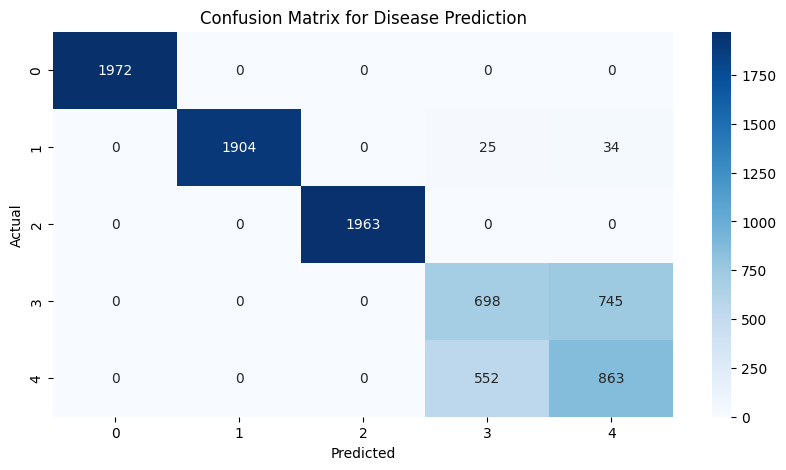

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
plt.figure(figsize=(10, 5))
cm_disease = confusion_matrix(y_test, predictions)
sns.heatmap(cm_disease, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Disease Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [88]:
import pandas as pd

# Assuming 'best_model' is already defined from the previous code
# Assuming 'le' (LabelEncoder) is already defined and fitted from the previous code
# Assuming 'X_train' (your training features) is already defined from the previous code

# Get the feature names used during model training
feature_names = X_train.columns

# Example input values (replace with your actual input)
input_values = { 'Animal': [0], #param {type:"integer"}
                'Symptom 1': [1], #param {type:"integer"}
                 'Symptom 2': [2], #param {type:"integer"}
                 'Symptom 3': [1], #param {type:"integer"}
                 'Age': [3], #param {type:"integer"}
                 'Temperature': [102.5] #param {type:"number"}
                 }

# Create a DataFrame for the input values
input_data = pd.DataFrame(input_values)

# Ensure the input data has the same feature names and order as during model training
input_data = input_data[feature_names]

# Make a prediction
prediction = best_model.predict(input_data)

# Get the predicted disease label (you might need to inverse transform it if needed)
predicted_disease = le.inverse_transform(prediction)[0]

# Print the prediction
print(f"Predicted Disease: {predicted_disease}")


Predicted Disease: foot and mouth
